In [1]:
#1
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#%matplotlib inline

#1.1
met_0 = pd.read_csv(r'E:\0_plus_1\home work\python\Sig_Eqs.tsv', sep='\t')
met_1 = met_0.dropna(axis=0, subset =["Total Deaths"]) # 丟弃"Total Deaths"列中有缺失值的行
met_1.head
met_2 = met_1.groupby(['Country'])['Deaths'].sum()#['Deaths'].sum()是统计每个国家的死亡人数，这个时候met_2就成了series而不是data frame
met_3 = met_2.sort_values(ascending=False)#对series排序时，不用写列表名
met_3.head(20)

Country
CHINA           2042844.0
TURKEY           995647.0
IRAN             758653.0
ITALY            413079.0
SYRIA            365700.0
HAITI            323476.0
AZERBAIJAN       310119.0
JAPAN            273687.0
ARMENIA          189000.0
PAKISTAN         143742.0
ECUADOR          134445.0
TURKMENISTAN     110412.0
PERU              90369.0
PORTUGAL          82572.0
GREECE            77260.0
IRAQ              70200.0
CHILE             63867.0
INDIA             62412.0
TAIWAN            57143.0
TUNISIA           48013.0
Name: Deaths, dtype: float64

Text(0, 0.5, 'Ms')

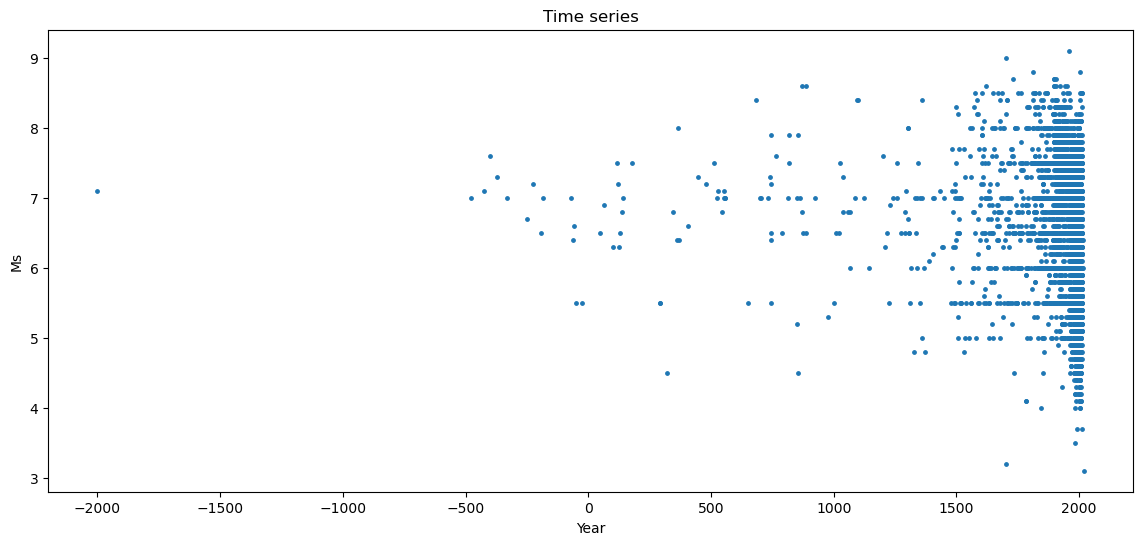

In [53]:
#1.2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
met_0 = pd.read_csv(r'E:\0_plus_1\home work\python\Sig_Eqs.tsv', sep='\t')
met_4 = met_0.dropna(axis=0, subset = ["Ms"])
met_time = met_4.loc[(met_4["Ms"] > 3)]
plt.figure(figsize=(14, 6))
plt.scatter(met_time["Year"], met_time["Ms"], s = 6)
plt.title('Time series')
plt.xlabel('Year')
plt.ylabel('Ms')



思考：通过图片我看到的趋势是，在19-20世纪的数据点比较多，而时间越早数据点越少，说明在现代科技的支持下，检测的数据更可靠，也更多。而且19-20世纪的MS大部分分布在4-8.5之间。

In [5]:
#1.3 我自己尝试写了之后，询问ai对我写的代码纠错
met_6 = met_0.dropna(axis=0, subset = ["Country", "Location Name", "Year", "Mo", "Dy", "Ms"])
met_6
met_7 = met_6[["Country", "Location Name", "Year", "Mo", "Dy", "Ms"]]
met_7

met_8 = met_7.loc[(met_7['Year'] > -2150)]
met_8.head()
def CountEq_LargestEq(country):
    met_country = met_8[met_8["Country"] == country]#使用布尔型Series作为索引，从met_8中筛选出所有"Country"列的值等于country的行
    total_eqs = len(met_country)
    if total_eqs >0:
        lagest_eqs = met_country.loc[met_country['Ms'].idxmax()]#idmax确定Ms里最大的值
        lagest_date = (lagest_eqs['Year'], lagest_eqs['Mo'], lagest_eqs['Dy'], lagest_eqs['Location Name'])
    else:
        lagest_eqs = None
    return total_eqs, lagest_eqs, lagest_date


unique_countries = met_8['Country'].unique()#将重复的国家筛掉，避免重复处理一个国家

for country in unique_countries:
    total_eqs, largest_eqs, largest_date = CountEq_LargestEq(country)#多重赋值，简洁的对多个变量进行赋值
    print(f"Country:{country}, Total_eq:{total_eqs}" )#用 f-string在字符串中插入变量
    if largest_eqs is not None and largest_date is not None:
        print(f"Largest EQ Date: {largest_date[0]}-{largest_date[1]}-{largest_date[2]}, Location: {largest_date[3]}")
    else:
          print("No EQs found.")

Country:CHINA, Total_eq:463
Largest EQ Date: 1920.0-12.0-16.0, Location: CHINA:  GANSU PROVINCE, SHANXI PROVINCE
Country:TURKEY, Total_eq:124
Largest EQ Date: 1939.0-12.0-26.0, Location: TURKEY:  ERZINCAN
Country:JORDAN, Total_eq:2
Largest EQ Date: 362.0-5.0-24.0, Location: JORDAN:  AL-KARAK
Country:GREECE, Total_eq:103
Largest EQ Date: 365.0-7.0-21.0, Location: GREECE:  CRETE:  KNOSSOS
Country:JAPAN, Total_eq:266
Largest EQ Date: 869.0-7.0-13.0, Location: JAPAN:  SANRIKU
Country:AFGHANISTAN, Total_eq:25
Largest EQ Date: 1909.0-7.0-7.0, Location: AFGHANISTAN:  HINDU-KUSH
Country:IRAN, Total_eq:153
Largest EQ Date: 856.0-12.0-22.0, Location: IRAN:  DAMGHAN, QUMIS
Country:SYRIA, Total_eq:1
Largest EQ Date: 1202.0-5.0-20.0, Location: SYRIA:  SOUTHWESTERN
Country:UKRAINE, Total_eq:7
Largest EQ Date: 1927.0-9.0-11.0, Location: UKRAINE:  CRIMEA:  SEBASTOPOL
Country:NEPAL, Total_eq:9
Largest EQ Date: 1505.0-6.0-6.0, Location: NEPAL-INDIA
Country:SLOVENIA, Total_eq:3
Largest EQ Date: 1511.0-3.

datetime64[ns]
float64


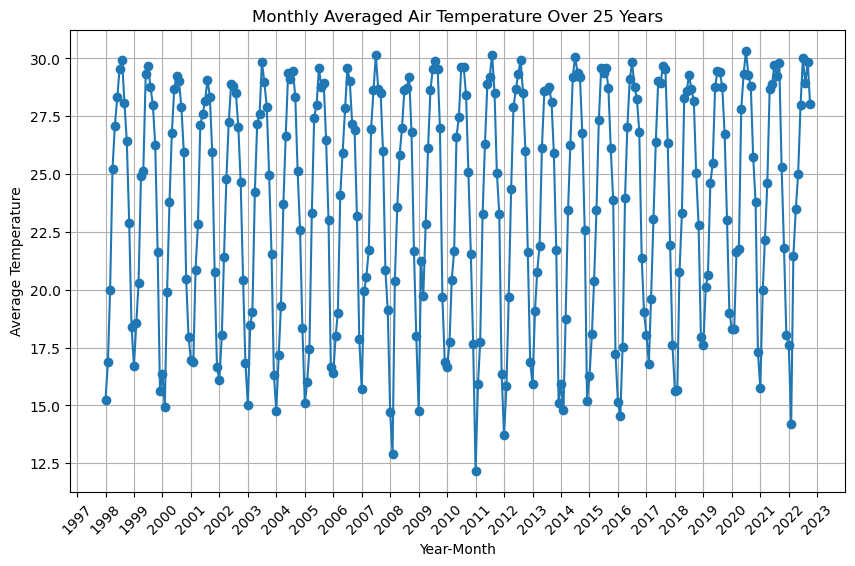

In [55]:
#2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
df = pd.read_csv(r'E:\0_plus_1\home work\python\homework2\Baoan_Weather_1998_2022.csv',
                 parse_dates=['DATE'],
                 usecols=['DATE','TMP'])

print(df['DATE'].dtypes)
df['DATE'].head(20)
#将TMP列中的+去掉
df['TMP'] = df['TMP'].str.replace('+', '')
df['TMP'] = df['TMP'].str.replace(',1', '')
df['TMP'] = df['TMP'].str.replace(',9', '')
df['TMP'] = df['TMP'].str.replace(',5', '')
# 删除TMP列中包含“,2”的数据行
df['TMP'] = df['TMP'].astype(str)
df = df[~df['TMP'].str.contains(',2')]

# 将TMP列中的9999替换为NaN，然后转换为数值型
df['TMP'] = df['TMP'].replace('9999', np.nan)
df['TMP'] = pd.to_numeric(df['TMP'])# errors= 'ignore'：忽略无法转化为数字的值
# 检查转换后的数据类型
print(df['TMP'].dtypes)

# 按照缩放因子，转换tmp值
df['TMP'] = df['TMP'] / 10

# 删除TMP列中NaN的行
df = df.dropna(subset=['TMP'])

# 按月分组并计算每月平均气温
#df['DATE'].dt.to_period('M')：将每个日期转换为对应的月份。这意味着，无论日期是月份中的哪一天，都会被归为该月的代表。例如，1998年1月15日会被转换为1998年1月。
#['TMP'].mean()：对每个月份的tmp进行求平均
monthly_avg_temp = df.groupby(df['DATE'].dt.to_period('M'))['TMP'].mean()

# 确保索引是正确的日期类型
#转换索引：to_period('M')创建的索引是Period对象，它们表示特定的月份，但不包含具体的日信息。to_timestamp()方法将这些Period对象转换为Timestamp对象，这些对象表示具体的日期（在这个上下文中，默认为每个月的第一天）。
#便于绘图：matplotlib在处理日期时，需要日期以Timestamp对象的形式存在，这样才能正确地解析和显示日期。将索引转换为Timestamp对象可以确保在绘图时，x轴的日期标签正确显示。
monthly_avg_temp.index = monthly_avg_temp.index.to_timestamp()

# 绘制图表
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_temp.index, monthly_avg_temp.values, marker='o')
plt.title('Monthly Averaged Air Temperature Over 25 Years')
plt.xlabel('Year-Month')
plt.ylabel('Average Temperature')
plt.grid(True)

# 设置横坐标格式
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())  # 每年一个主刻度
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # 显示年-月
plt.xticks(rotation=45)  # 旋转标签以便更好地显示

plt.show()



思考：在过去25年里的气温趋势基本上都是1-7或8月开始上升，然后9-12月开始下降。并且最高温度基本上在30度左右，最低温在15-12.5之间

In [59]:
#3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
df = pd.read_csv('E:/0_plus_1/home work/python/homework2/ibtracs.ALL.list.v04r00.csv',
                  skiprows=[1], #跳过文件中的单位行
                 parse_dates=['ISO_TIME'],#将ISO_TIME列解析为日期时间格式
                  na_values=[' '],#将空格作为nan
                 usecols=['NAME', 'WMO_WIND','ISO_TIME', 'SID', 'BASIN', 'LAT', 'LON'],#只读这几列
                 dtype={'WMO_WIND': float})

In [15]:
#3.1
df = df.dropna(subset =["WMO_WIND"]) # 丟弃缺失值。subset ：指定只考虑某些列

# 对每个分组按照WMO_WIND降序排序，并找到每组前十个数据
#lamba:小型匿名函数，可以接受任意数量的参数，但只能有一个表达式。lamba 参数1，参数2，。。。：表达式。表达式的结果是该函数的返回值
#apply：对每个分组进行操作
top_10_per_group = df.groupby('SID').apply(lambda x: x.sort_values('WMO_WIND', ascending=False).head(10))

# 重置索引，因为每个分组的head(10)会保留原始的索引
top_10_per_group.reset_index(drop=True, inplace=True)

print(top_10_per_group)

                 SID BASIN       NAME            ISO_TIME      LAT       LON  \
0      1851175N26270   NaN  NOT_NAMED 1851-06-25 00:00:00  27.5333  -94.2667   
1      1851175N26270   NaN  NOT_NAMED 1851-06-25 06:00:00  27.8000  -95.0800   
2      1851175N26270   NaN  NOT_NAMED 1851-06-25 12:00:00  27.9000  -95.7333   
3      1851175N26270   NaN  NOT_NAMED 1851-06-25 18:00:00  28.0333  -96.2667   
4      1851175N26270   NaN  NOT_NAMED 1851-06-25 21:00:00  28.1333  -96.5667   
...              ...   ...        ...                 ...      ...       ...   
54535  2021311N13248    EP     SANDRA 2021-11-07 06:00:00  13.3000 -112.4000   
54536  2021311N13248    EP     SANDRA 2021-11-08 18:00:00  14.9000 -117.3000   
54537  2021311N13248    EP     SANDRA 2021-11-09 00:00:00  15.1000 -118.2000   
54538  2021311N13248    EP     SANDRA 2021-11-09 06:00:00  15.0000 -119.1000   
54539  2021311N13248    EP     SANDRA 2021-11-09 12:00:00  14.7000 -120.1000   

       WMO_WIND  
0          80.0  
1  

C:\Users\DELL\AppData\Local\Temp\ipykernel_48348\1236169277.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_per_group = df.groupby('SID').apply(lambda x: x.sort_values('WMO_WIND', ascending=False).head(10))


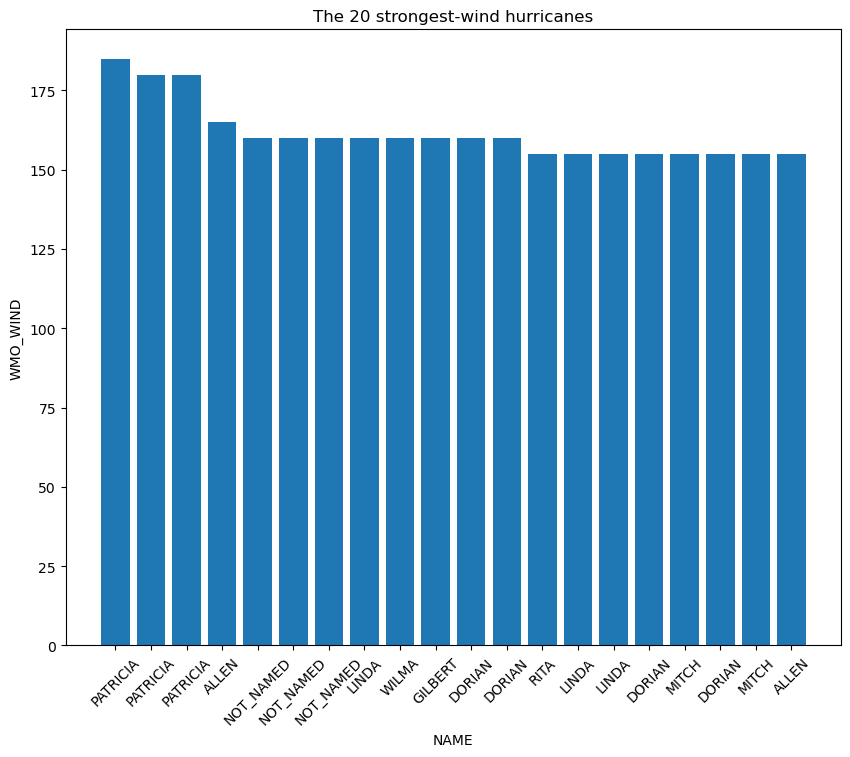

In [17]:
#3.2
df_wind = df.sort_values("WMO_WIND", ascending=False)
df_wind_largest20 = df_wind.head(20)
df_wind_largest20

values = df_wind_largest20['WMO_WIND']

# 获取NAME列的值作为x轴的刻度标签
names = df_wind_largest20['NAME']

# 绘制条形图
plt.figure(figsize=(10, 8)) 
plt.bar(range(len(values)), values)  # 使用数值索引作为x轴

# 设置x轴的刻度标签为NAME列的值
plt.xticks(range(len(names)), names, rotation=45)  # 旋转标签以便更好地显示

plt.title('The 20 strongest-wind hurricanes')
plt.xlabel('NAME')
plt.ylabel('WMO_WIND')

plt.show()

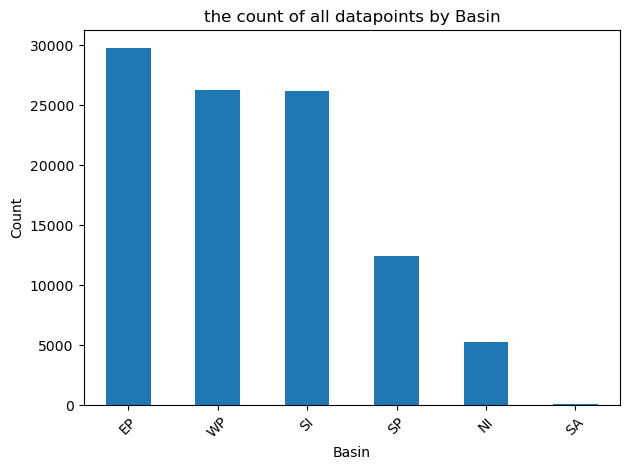

In [19]:
#3.3

basin_count = df['BASIN'].value_counts()#对basin列进行计数

basin_count.plot(kind = 'bar')#绘制条形图
plt.xlabel('Basin')
plt.ylabel('Count')
plt.title('the count of all datapoints by Basin')
plt.xticks(rotation = 45)
plt.tight_layout()#调整布局防止标签被截断
plt.show()

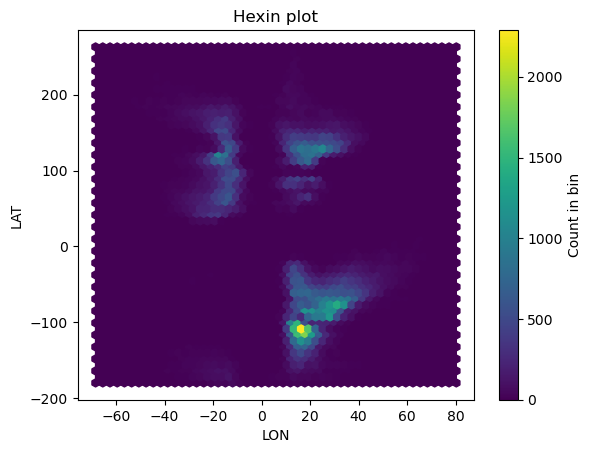

In [21]:
#3.4
#绘制六边形分箱图
plt.hexbin(df['LAT'], df['LON'], gridsize=50, cmap='viridis')#gridsize控制六边形的大小和数量，cmap控制颜色映射
plt.colorbar(label = 'Count in bin')#添加颜色条
plt.title('Hexin plot')
plt.xlabel('LON')
plt.ylabel('LAT')
plt.show()

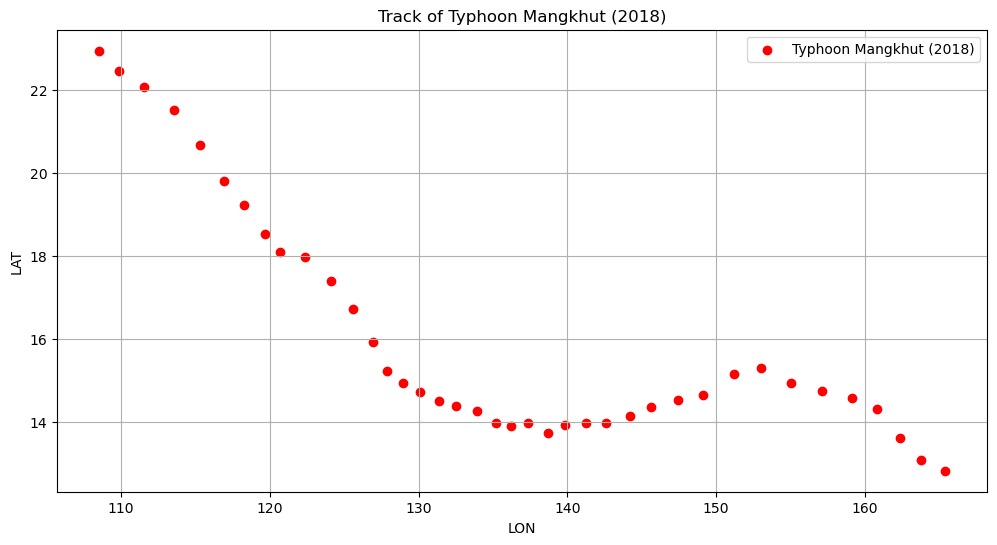

In [25]:
#3.5
MANGKHUT_data = df[df['NAME'] == 'MANGKHUT']
MANGKHUT_2018 = MANGKHUT_data[MANGKHUT_data['ISO_TIME'].dt.year == 2018]#dt：用于访问series中的时间属性
LON = MANGKHUT_2018['LON']
LAT = MANGKHUT_2018['LAT']

plt.figure(figsize=(12, 6))
plt.scatter(LON, LAT, color='red', label='Typhoon Mangkhut (2018)')
plt.xlabel('LON')
plt.ylabel('LAT')
plt.title('Track of Typhoon Mangkhut (2018)')
plt.grid(True)#开启网格线
plt.legend()#添加标签
plt.show()

In [61]:
#3.6
df_BASIN = df[df['BASIN'].isin(['WP', 'EP'])]
df_BASIN['YEAR'] = df_BASIN['ISO_TIME'].dt.year
df_BASIN = df_BASIN[df_BASIN['YEAR'] >= 1970]

C:\Users\DELL\AppData\Local\Temp\ipykernel_48348\1014047956.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BASIN['YEAR'] = df_BASIN['ISO_TIME'].dt.year


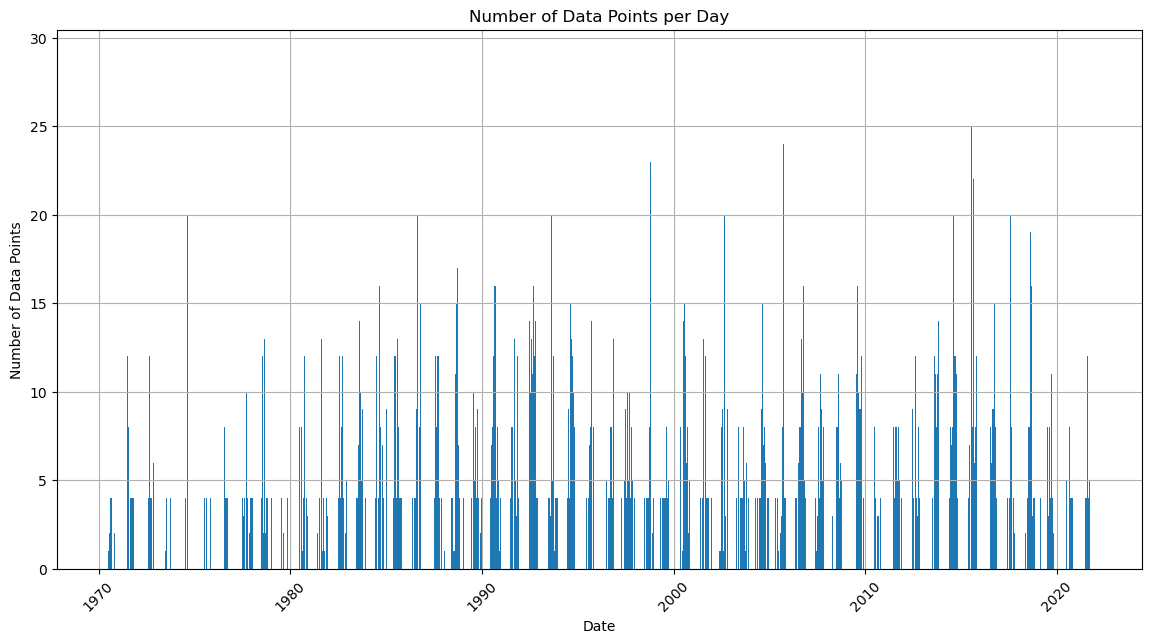

In [29]:
#3.7
# 提取日期
df_BASIN['DATE'] = df_BASIN['ISO_TIME'].dt.date

# 计算每天的数据点数量
daily_counts = df_BASIN['DATE'].value_counts().sort_index()#sort_index()将这些日期按照从小到大的顺序排序，即按日期顺序排列

# 绘制条形图
plt.figure(figsize=(14, 7))
plt.bar(daily_counts.index, daily_counts.values)

plt.xlabel('Date')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points per Day')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

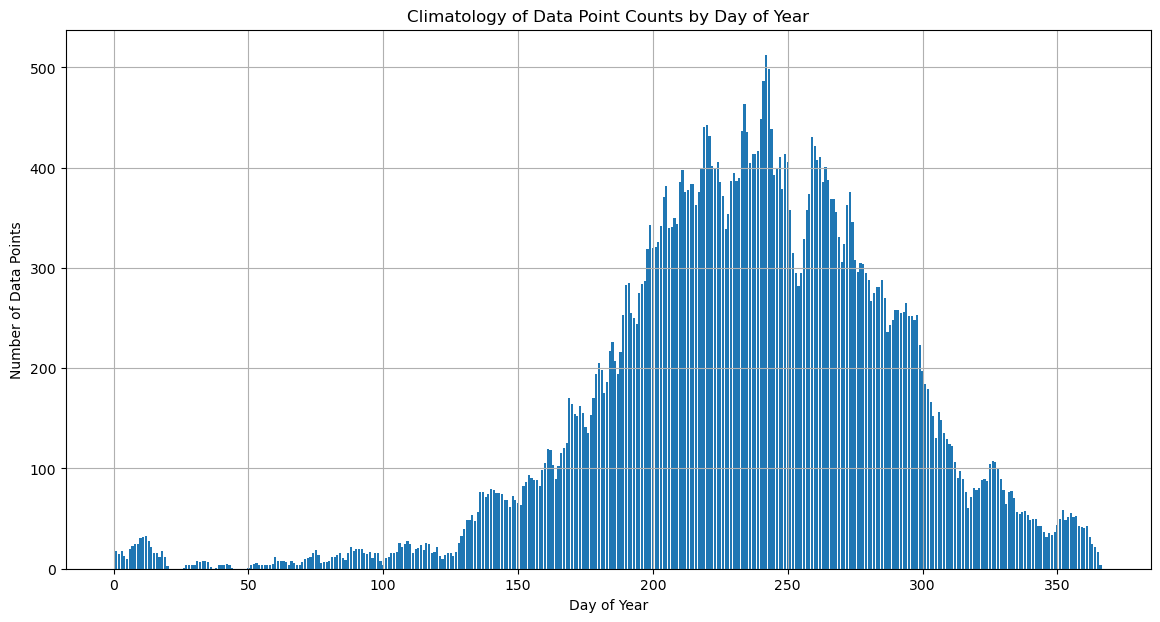

In [31]:
#3.8
#计算每一年的天数。dayofyear：.dt 访问器的一个属性，它返回日期时间对象中存储的那一天是一年中的第几天。例如，1月1日返回1，12月31日返回365（或闰年的366）
df_BASIN['DAY_OF_YEAR'] = df_BASIN['ISO_TIME'].dt.dayofyear

DAY_OF_YEAR_count = df_BASIN['DAY_OF_YEAR'].value_counts().sort_index()

plt.figure(figsize=(14, 7))
plt.bar(DAY_OF_YEAR_count.index, DAY_OF_YEAR_count.values)
plt.xlabel('Day of Year')
plt.ylabel('Number of Data Points')
plt.title('Climatology of Data Point Counts by Day of Year')
plt.grid(True)
plt.show()

思考：台风多发生在6-9月

In [33]:
#3.9

group_data = df_BASIN.groupby('DAY_OF_YEAR')
print(group_data)
climatology = df_BASIN.groupby('DAY_OF_YEAR')['WMO_WIND'].transform('mean')#transform('mean'):将平均值的数量增加到跟group_data一样

df_BASIN['WMO_WIND_anom'] = df_BASIN['WMO_WIND'] - climatology
df_BASIN.WMO_WIND_anom

351440    -6.666667
351442    -6.666667
351444    -5.468750
351446    -5.468750
351448    -5.468750
            ...    
703055   -23.555556
703057   -28.555556
703059   -28.555556
703061   -28.555556
703063   -31.288660
Name: WMO_WIND_anom, Length: 52023, dtype: float64

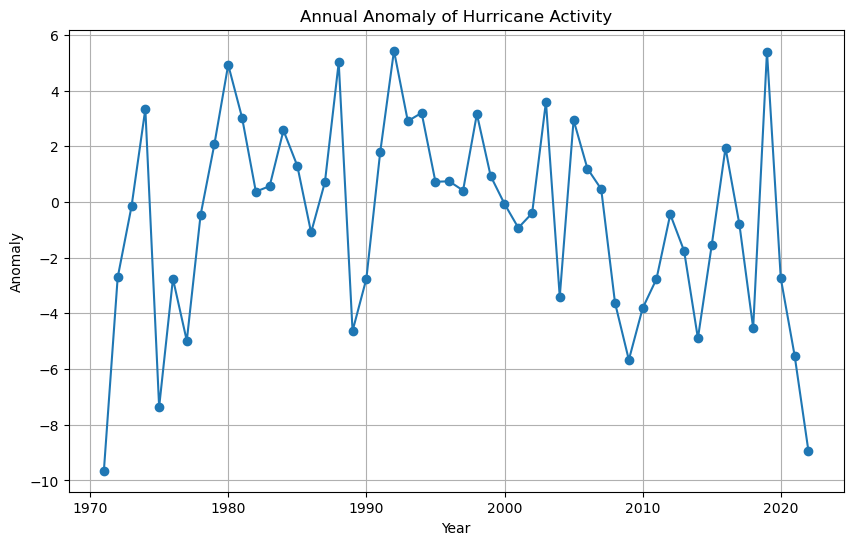

In [35]:
# 3.10
# 将ISO_TIME列设置为索引
df_BASIN_index = df_BASIN.set_index('ISO_TIME', inplace=False)

# 对ANOMALY列进行年分辨率的重采样，并计算每年的平均异常值
anomalies_resampled = df_BASIN_index['WMO_WIND_anom'].resample('YE').mean()#YE:年末尾度，将每年的数据汇总到该年的最后一日

# 绘制图表
plt.figure(figsize=(10, 6))
plt.plot(anomalies_resampled.index, anomalies_resampled.values, marker='o')
plt.title('Annual Anomaly of Hurricane Activity')
plt.xlabel('Year')
plt.ylabel('Anomaly')
plt.grid(True)
plt.show()

第四题我想对全球10度分箱海洋观测数据表中的海平面压力（SEA_LVL_PRES）在2021.1月这段时间内的变化趋势，以及它和海洋表面温度（SEA_SURF_TEMP）之间的相关性

In [41]:
#4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#4.1
df = pd.read_csv(r'E:\0_plus_1\home work\python\homework2\30_-80_20_-70.csv',
                parse_dates=['DATE'],#将Time of Observation列解析为日期时间格式
                 na_values=[' '],
                usecols=['LATITUDE', 'LONGITUDE','DATE', 'SEA_LVL_PRES','SEA_SURF_TEMP'],
                dtype={'SEA_LVL_PRES': float, 'SEA_SURF_TEM': float})

df= df.dropna(subset =["SEA_LVL_PRES","SEA_SURF_TEMP"])

print(df)

                     DATE  LATITUDE  LONGITUDE  SEA_LVL_PRES  SEA_SURF_TEMP
0     2012-01-01 00:00:00     28.90     -78.50       10222.0          236.0
1     2012-01-01 00:00:00     27.50     -71.50       10234.0          254.0
3     2012-01-01 00:00:00     25.50     -79.80       10230.0          244.0
4     2012-01-01 00:00:00     26.00     -79.50       10200.0          263.0
5     2012-01-01 00:00:00     23.70     -74.60       10200.0          280.0
...                   ...       ...        ...           ...            ...
14040 2012-01-31 23:00:00     25.90     -79.80       10247.0          230.0
14041 2012-01-31 23:00:00     21.20     -75.80       10214.0          260.0
14043 2012-01-31 23:20:00     23.25     -73.15       10224.0          252.0
14047 2012-01-31 23:50:00     28.90     -78.50       10273.0          229.0
14048 2012-01-31 23:50:00     27.50     -71.50       10266.0          233.0

[8133 rows x 5 columns]


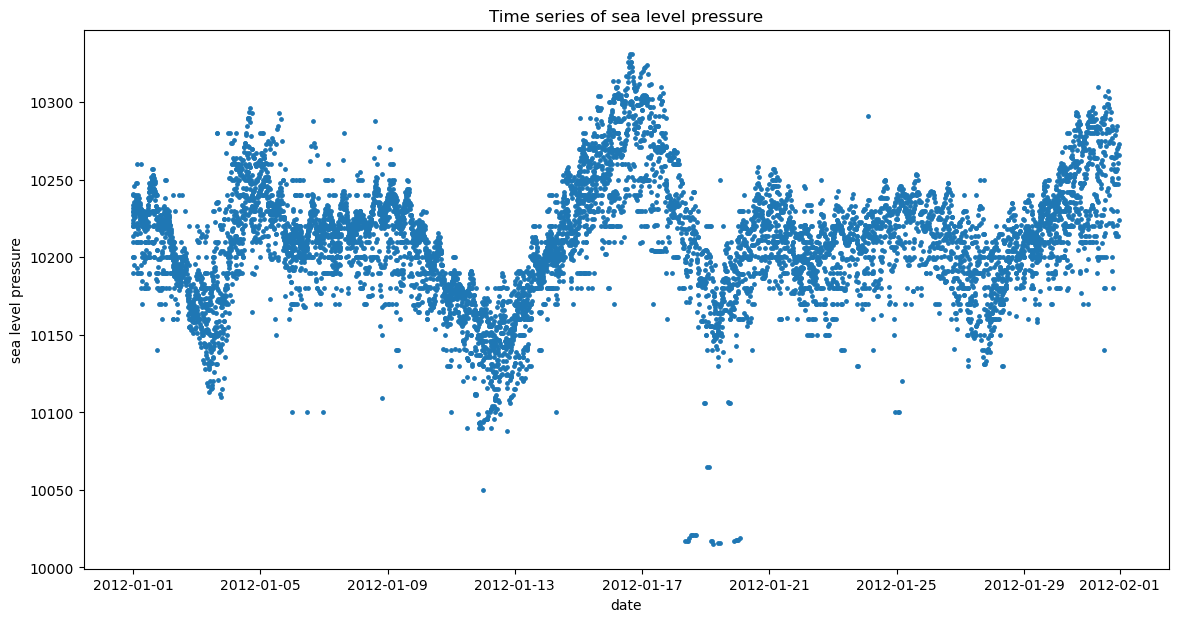

In [43]:
#4.2画海平面压力的时间序列图
plt.figure(figsize=(14, 7))
plt.scatter(df['DATE'], df['SEA_LVL_PRES'], s = 6)
plt.title('Time series of sea level pressure')
plt.xlabel('date')
plt.ylabel('sea level pressure')

plt.show()

In [49]:
#4.3
#查看各列数据的平均值。最小值、最大值等等
df.describe()


,DATE,LATITUDE,LONGITUDE,SEA_LVL_PRES,SEA_SURF_TEMP
count,8133,8133.000000,8133.000000,8133.000000,8133.000000
mean,2012-01-15 09:47:45.909258496,26.646286,-74.818847,10209.811386,239.770195
min,2012-01-01 00:00:00,20.000000,-80.000000,10015.000000,156.000000
25%,2012-01-07 15:40:00,25.100000,-78.500000,10188.000000,229.000000
50%,2012-01-14 12:20:00,27.500000,-74.100000,10211.000000,237.000000
75%,2012-01-22 20:40:00,28.900000,-71.600000,10231.000000,250.000000
max,2012-01-31 23:50:00,29.990000,-70.010000,10331.000000,307.000000
std,NaN,2.597157,3.113659,37.957426,16.301442


In [47]:
#续4.3

#检查异常值(四分位距法)
Q1 = df['SEA_LVL_PRES'].quantile(0.25)
Q3 = df['SEA_LVL_PRES'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df[(df['SEA_LVL_PRES'] >= lower_bound) & (df['SEA_LVL_PRES'] <= upper_bound)]

print(df_cleaned)

#正态检验（Shapiro-Wilk检验）:数据是否服从正态分布
from scipy.stats import shapiro
stat, p_value = shapiro(df['SEA_LVL_PRES'])
print('SEA_LVL_PRES Shapiro-Wilk Test:', 'Pass' if p_value > 0.05 else 'Fail')

stat, p_value = shapiro(df['SEA_SURF_TEMP'])
print('SEA_SURF_TEMP Shapiro-Wilk Test:', 'Pass' if p_value > 0.05 else 'Fail')
#SEA_LVL_PRES和SEA_SURF_TEMP不服从正态分布


#相关性检验:计算两个变量之间的皮尔森相关系数，检查它们是否存在线性关系。
from scipy.stats import pearsonr
corr, p_value = pearsonr(df['SEA_LVL_PRES'], df['SEA_SURF_TEMP'])
print('Pearson Correlation:', corr)

#SEA_LVL_PRES和SEA_SURF_TEMP负相关（皮尔森系数在-1~0期间为负相关）


#方差齐性检验:使用Levene检验来检查不同组数据的方差是否相等。
sea_level_pressure = df['SEA_LVL_PRES']
sea_suface_temperature = df['SEA_SURF_TEMP']

from scipy.stats import levene
stat, p_value = levene(sea_level_pressure, sea_suface_temperature)
print('Levene Test:', 'Equal variances' if p_value > 0.05 else 'Unequal variances')

#两组数据的方差不齐，可能会对某些统计分析的结果产生影响，尤其是那些假设方差齐性的统计测试。

#秩和检验（Mann-Whitney U检验）:用于比较两组数据的分布是否不同，适用于非正态数据。
from scipy.stats import mannwhitneyu
stat, p_value = mannwhitneyu(sea_level_pressure, sea_suface_temperature)
print('Mann-Whitney U Test:', 'No significant difference' if p_value > 0.05 else 'Significant difference')

#两组数据有很大的差异


                     DATE  LATITUDE  LONGITUDE  SEA_LVL_PRES  SEA_SURF_TEMP
0     2012-01-01 00:00:00     28.90     -78.50       10222.0          236.0
1     2012-01-01 00:00:00     27.50     -71.50       10234.0          254.0
3     2012-01-01 00:00:00     25.50     -79.80       10230.0          244.0
4     2012-01-01 00:00:00     26.00     -79.50       10200.0          263.0
5     2012-01-01 00:00:00     23.70     -74.60       10200.0          280.0
...                   ...       ...        ...           ...            ...
14040 2012-01-31 23:00:00     25.90     -79.80       10247.0          230.0
14041 2012-01-31 23:00:00     21.20     -75.80       10214.0          260.0
14043 2012-01-31 23:20:00     23.25     -73.15       10224.0          252.0
14047 2012-01-31 23:50:00     28.90     -78.50       10273.0          229.0
14048 2012-01-31 23:50:00     27.50     -71.50       10266.0          233.0

[7865 rows x 5 columns]
SEA_LVL_PRES Shapiro-Wilk Test: Fail
SEA_SURF_TEMP Shapiro-Wilk

C:\Users\DELL\AppData\Local\Temp\ipykernel_48348\1331205771.py:17: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8133.
  stat, p_value = shapiro(df['SEA_LVL_PRES'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_48348\1331205771.py:20: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8133.
  stat, p_value = shapiro(df['SEA_SURF_TEMP'])


思考：综上所述，SEA_LVL_PRES和SEA_SURF_TEMP之间的相关性可能很低